In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import numpy as np

In [ ]:
df_stats = DF_STATS_GENDER.copy()
df_stats_melt = pd.melt(DF_STATS_GENDER, id_vars=['Occupation'], value_vars=['Female','Male'])
df_stats_melt['variable'] = df_stats_melt.apply(lambda x: x['variable'].lower(), axis=1)
df_stats_melt = df_stats_melt.sort_values('value', ascending=False)

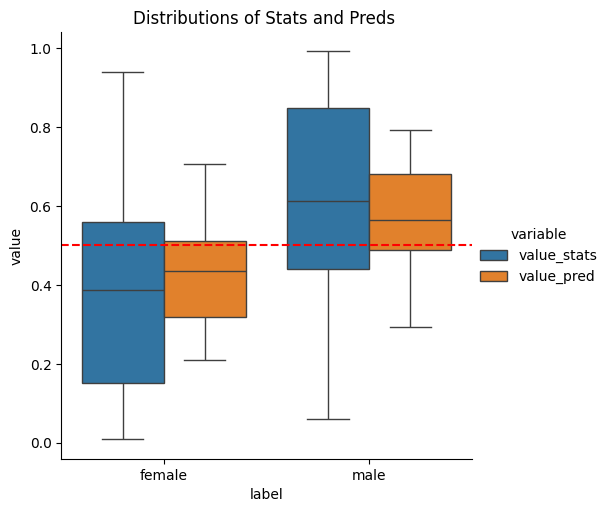

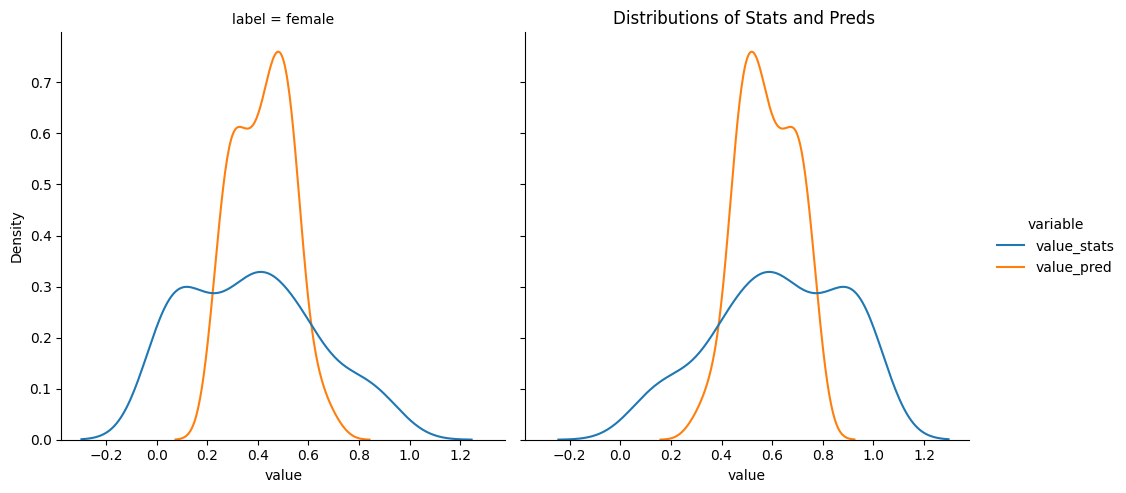

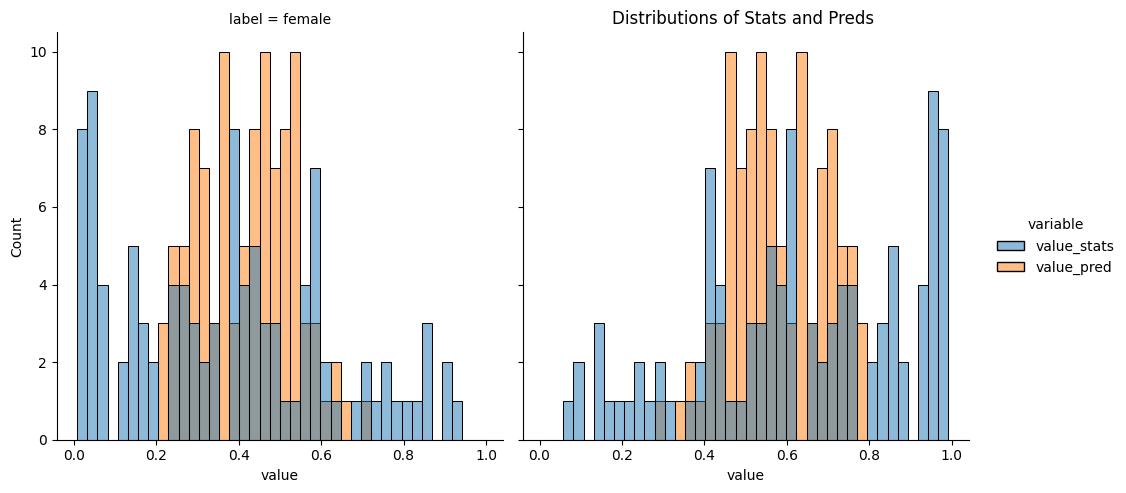

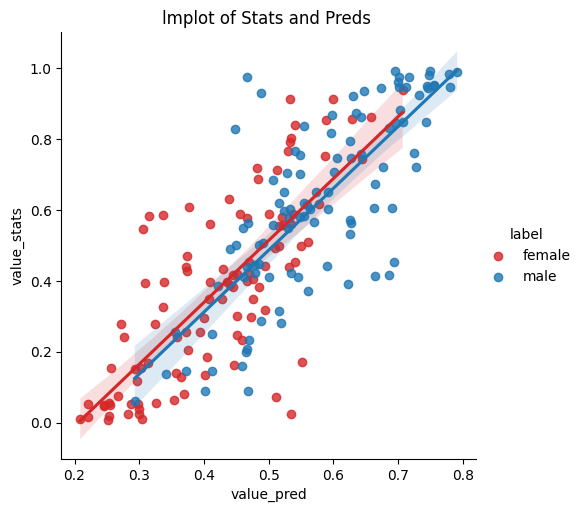

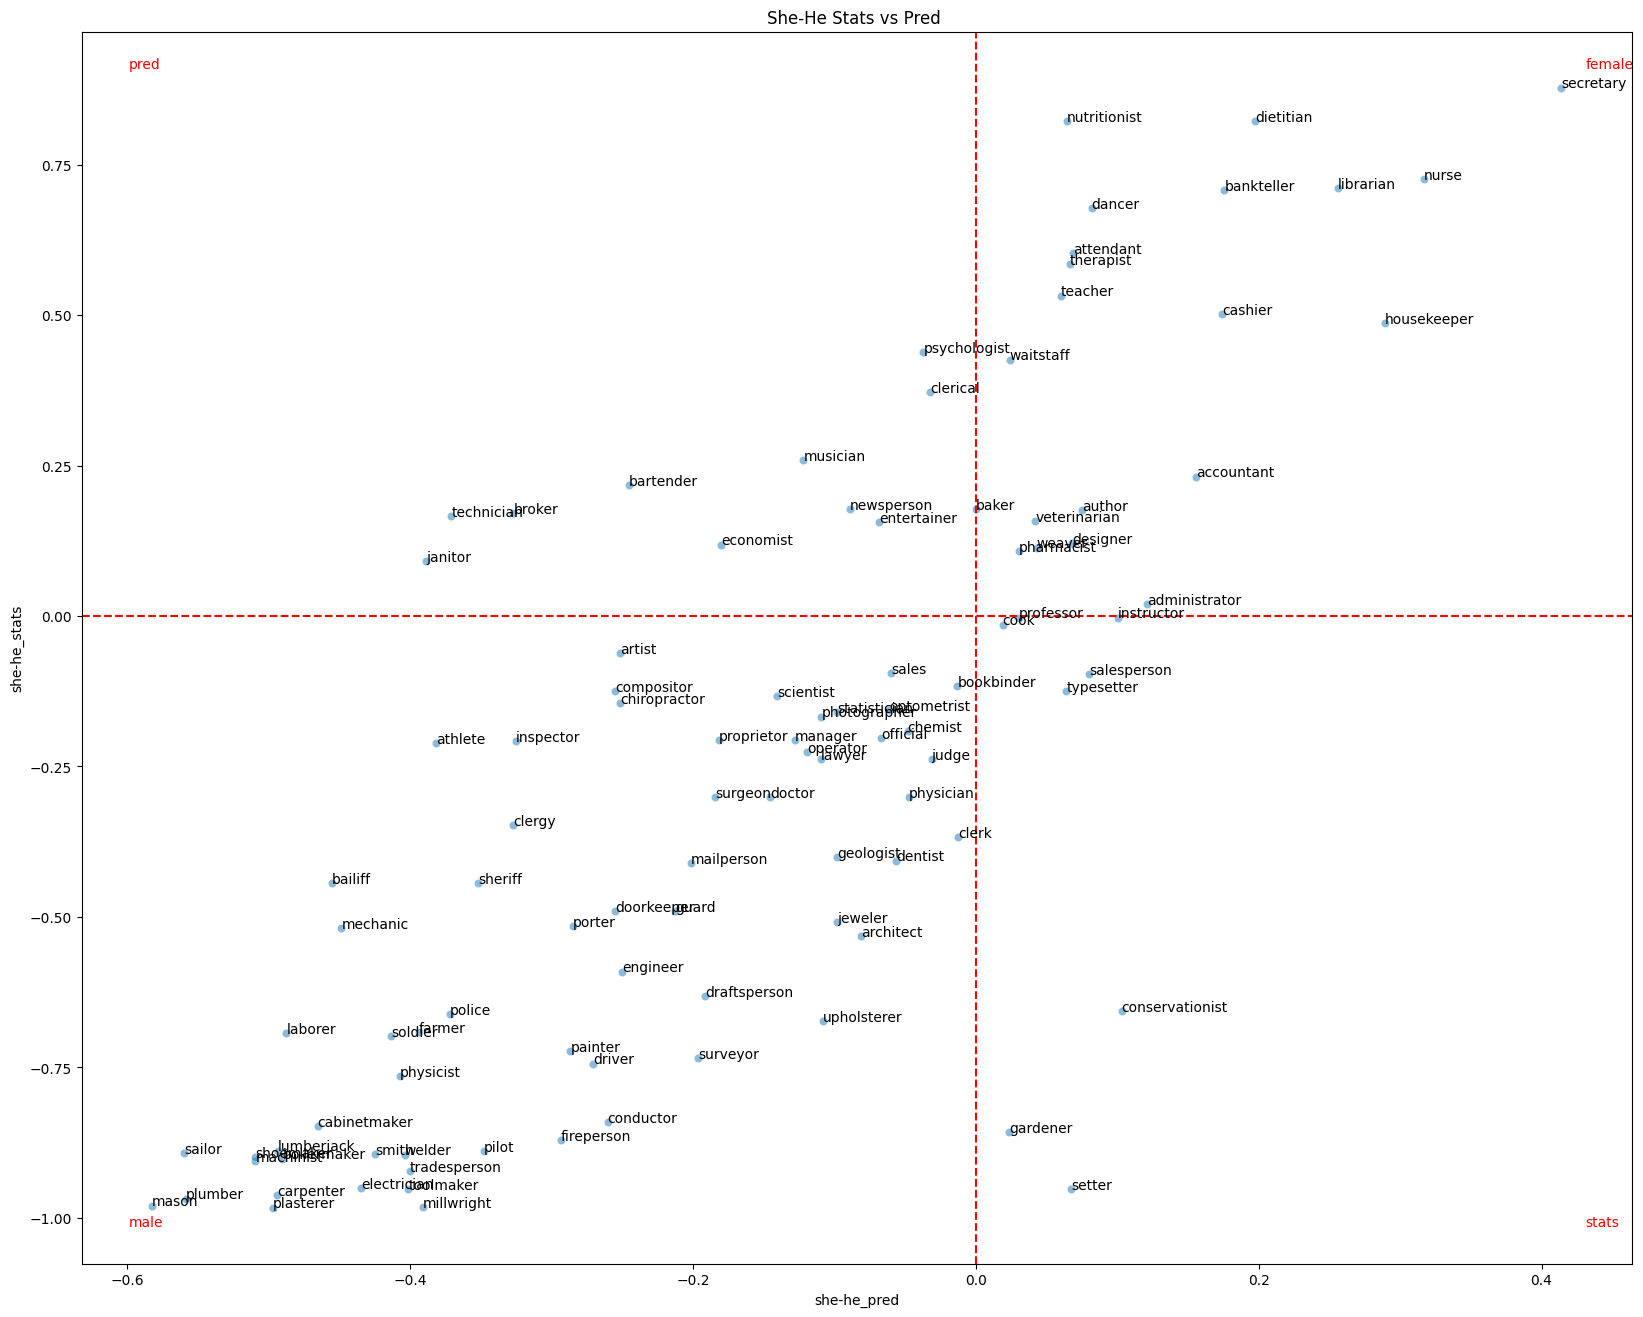

mask-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_20672/2521600659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
/Users/tommasoromano/Documents/websites/nlp-project/analysis_utils.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


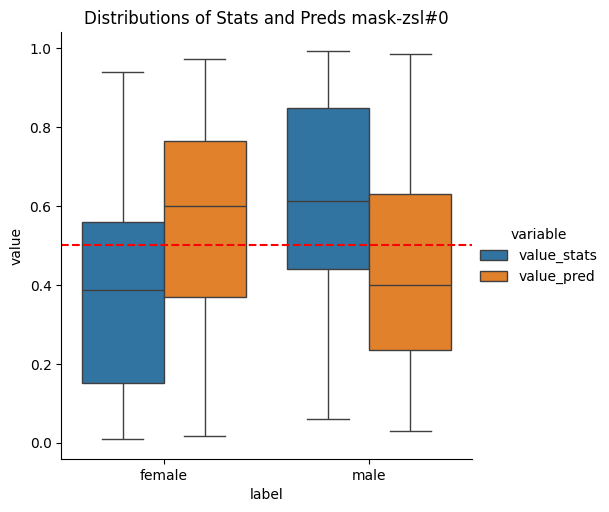

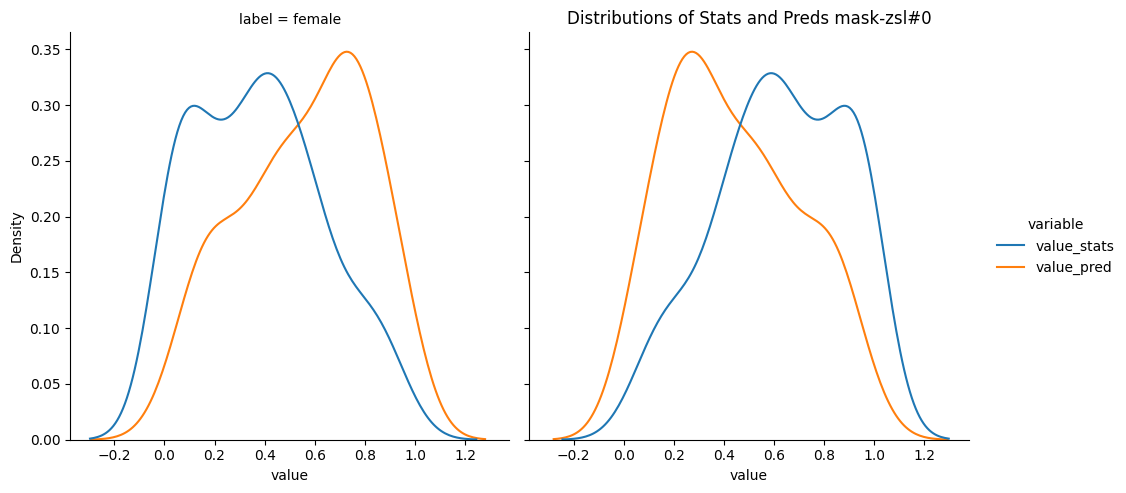

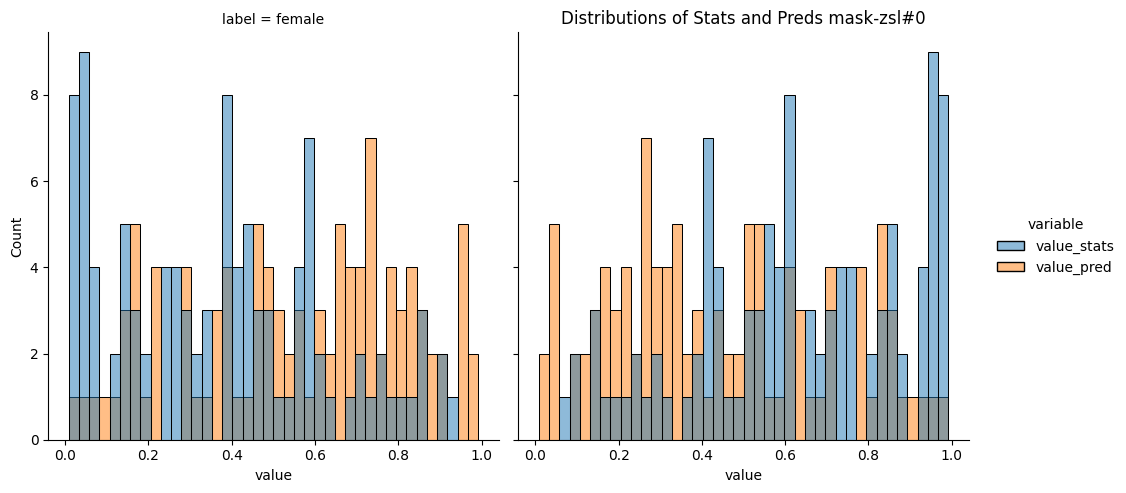

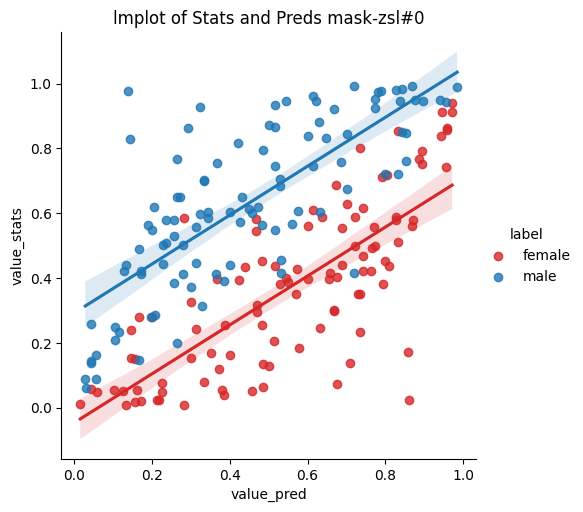

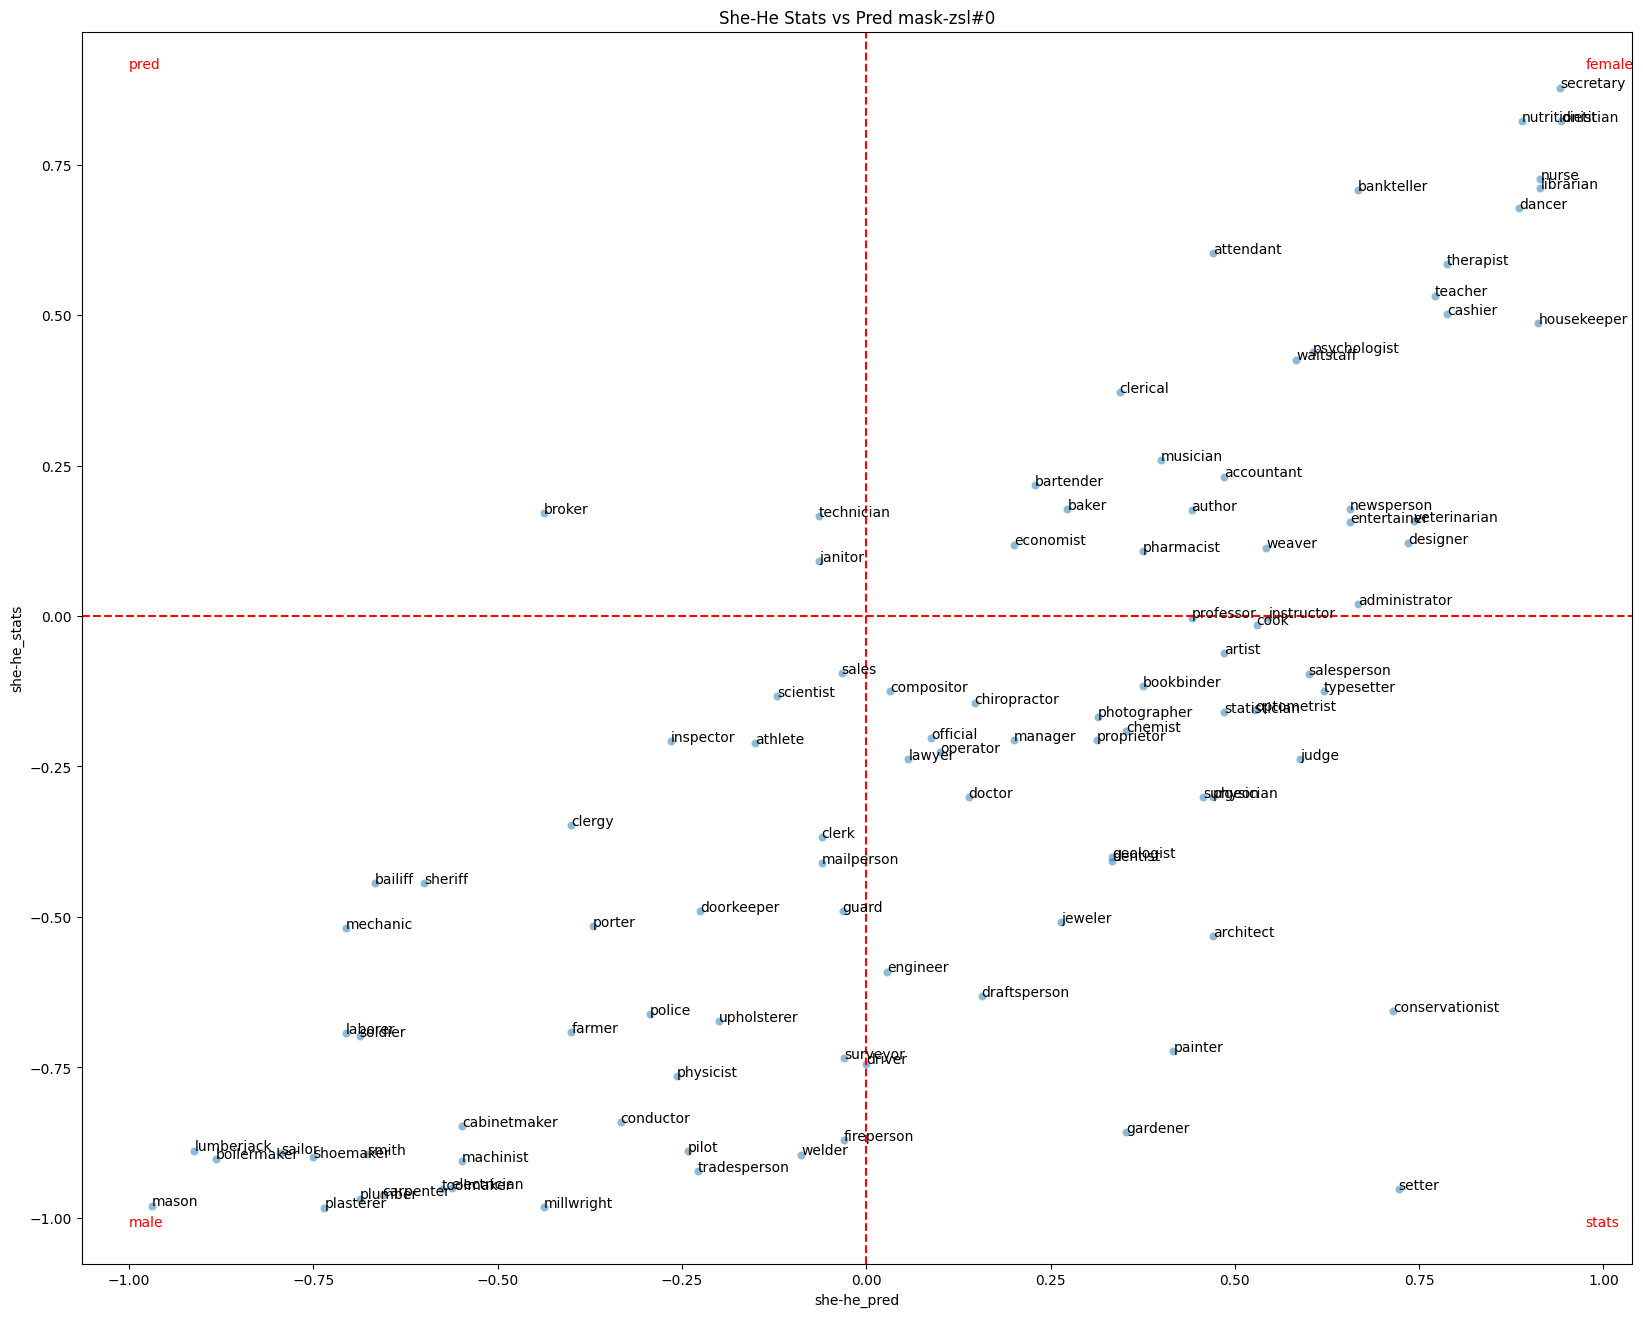

mask-neutral-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_20672/2521600659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
/Users/tommasoromano/Documents/websites/nlp-project/analysis_utils.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


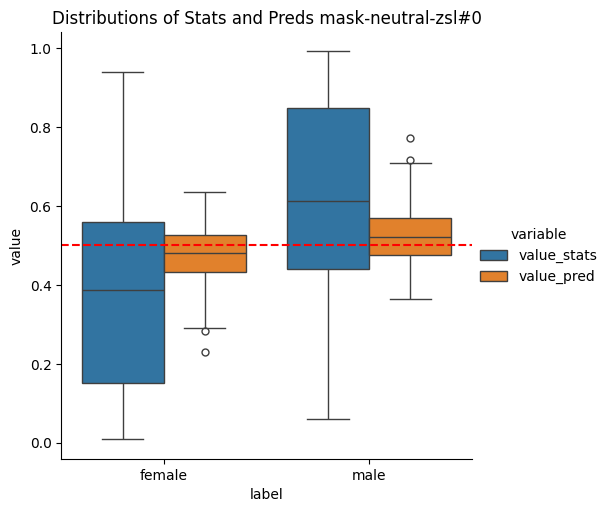

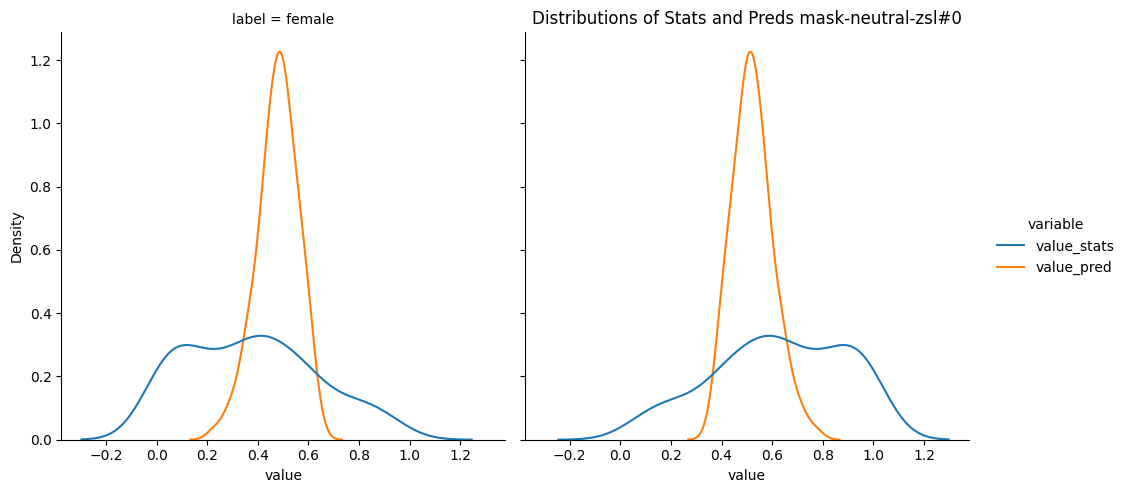

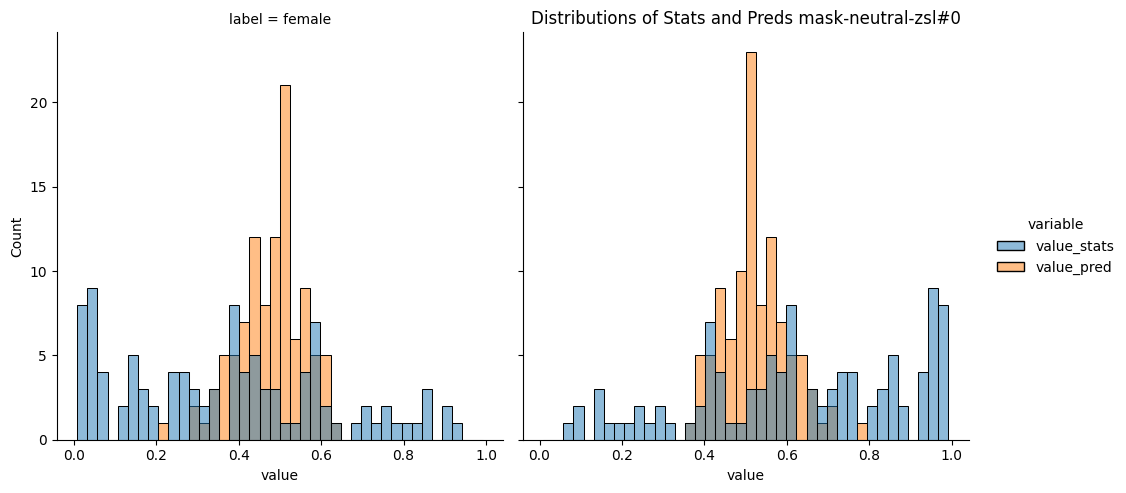

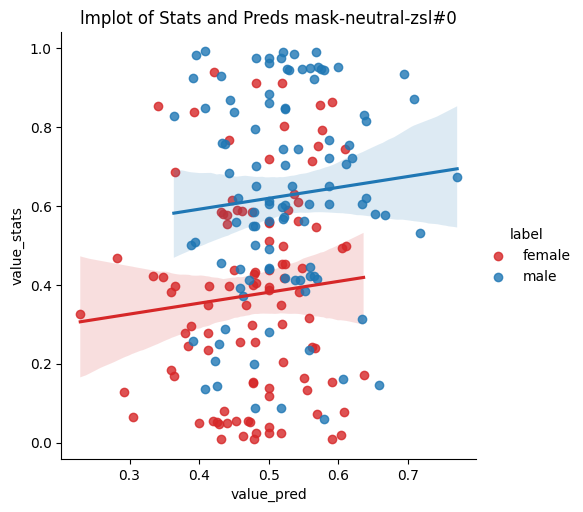

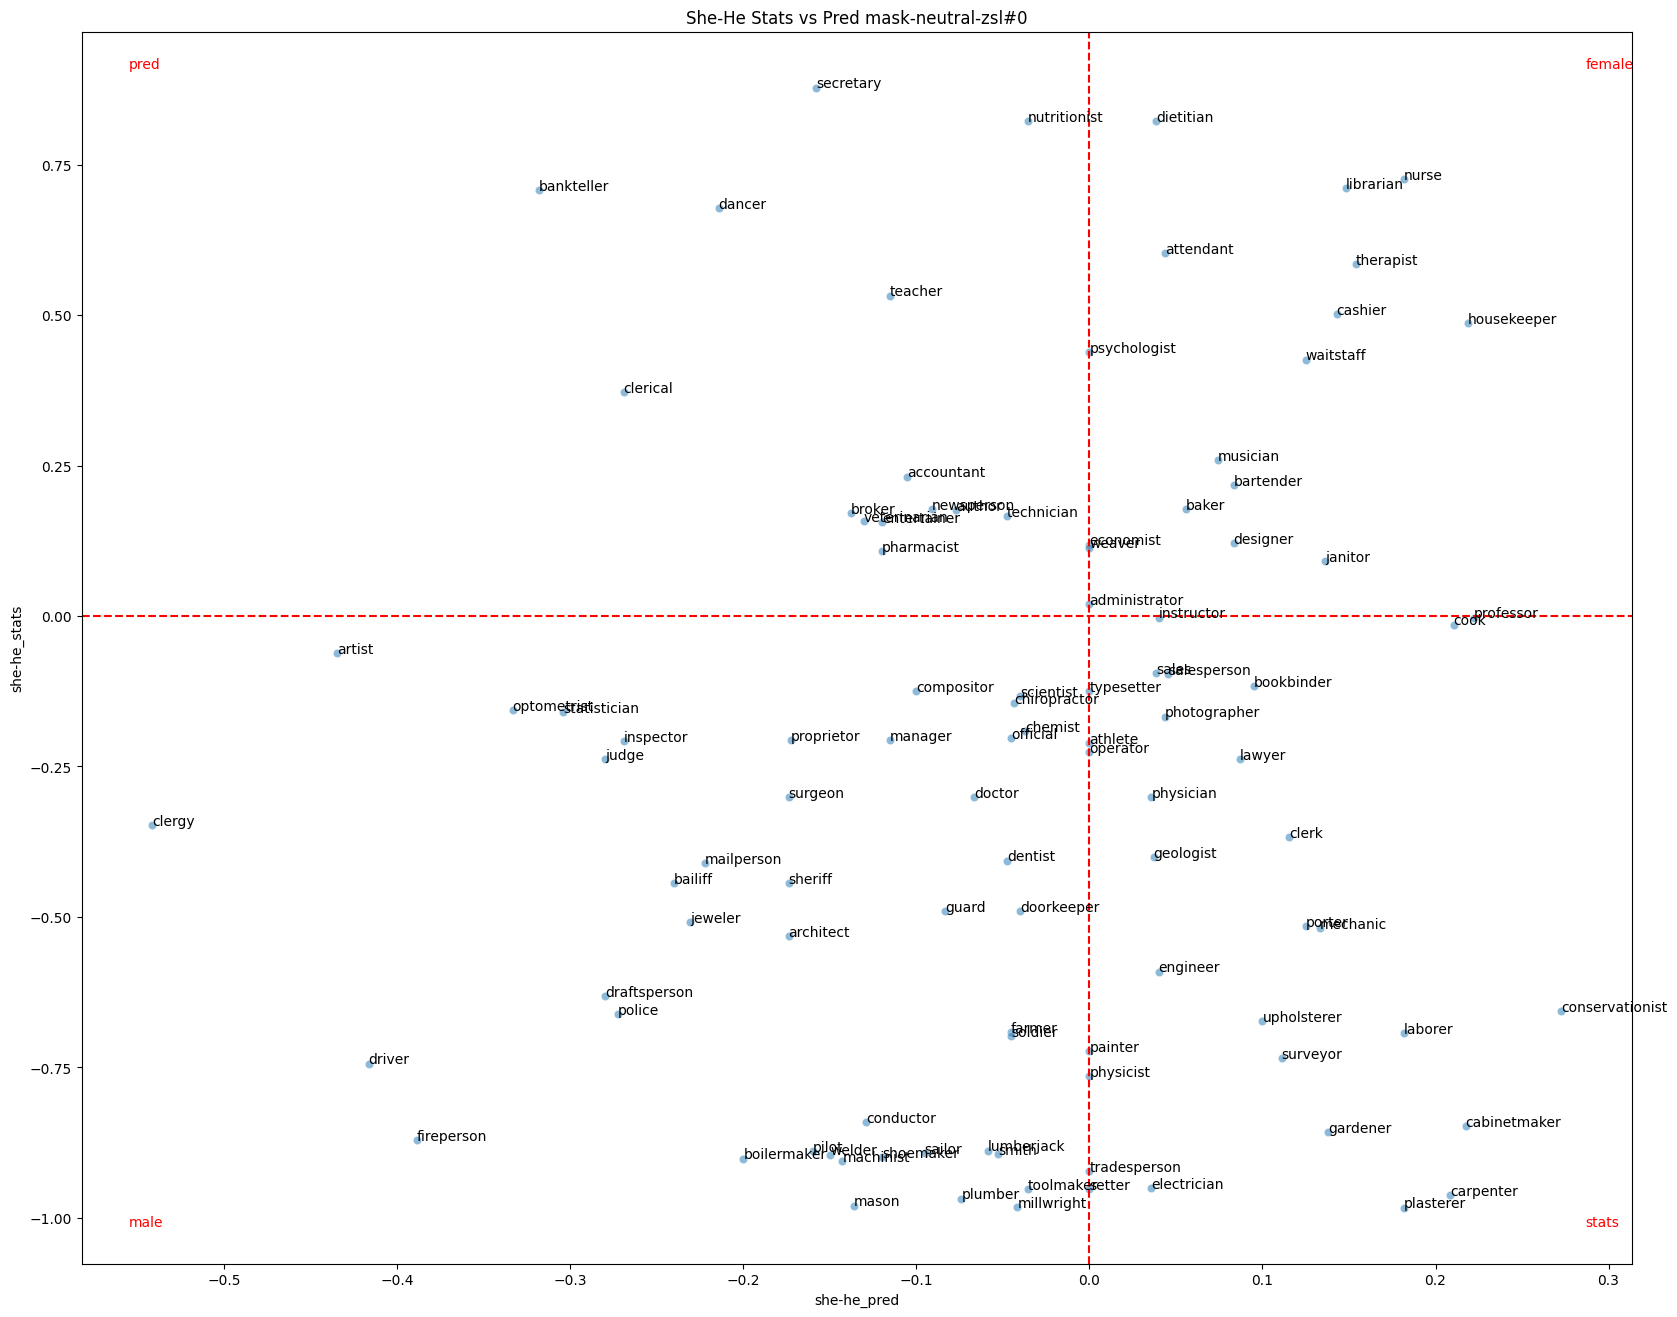

label-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_20672/2521600659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
/Users/tommasoromano/Documents/websites/nlp-project/analysis_utils.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


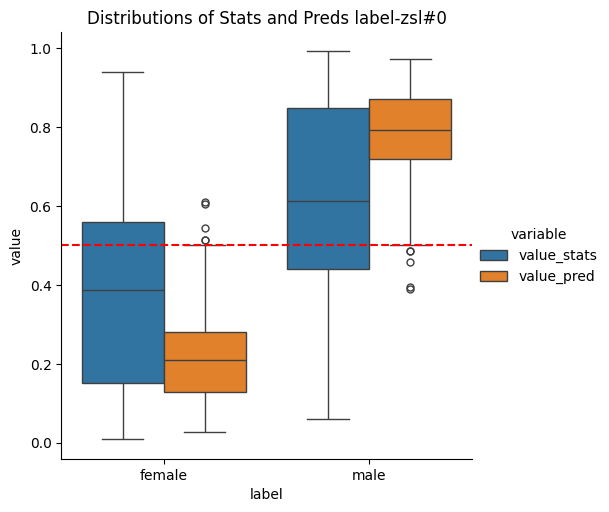

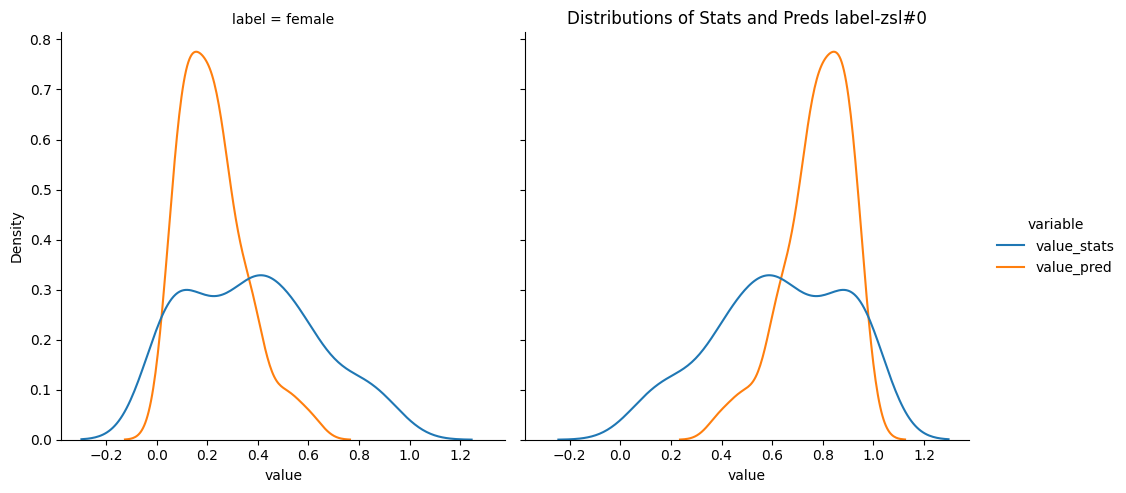

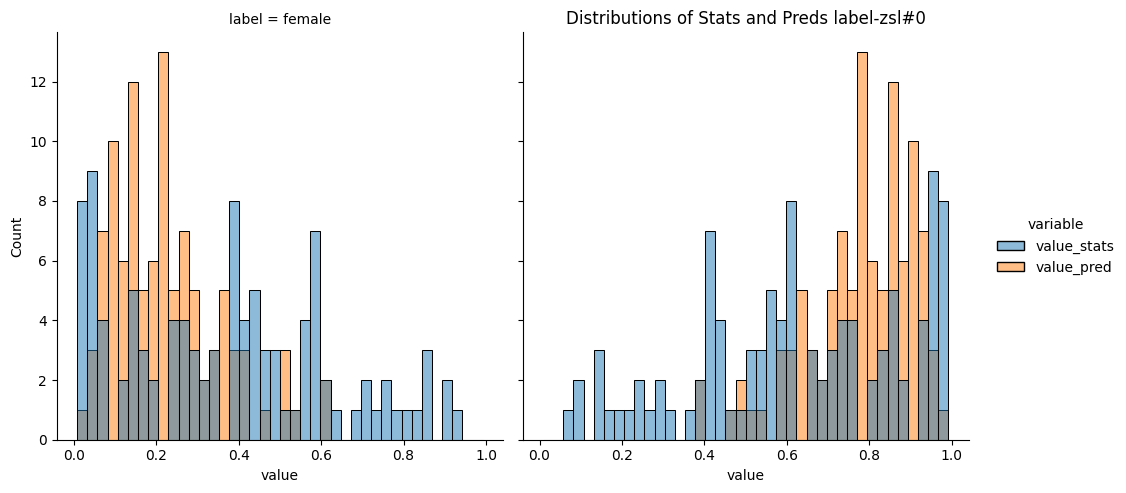

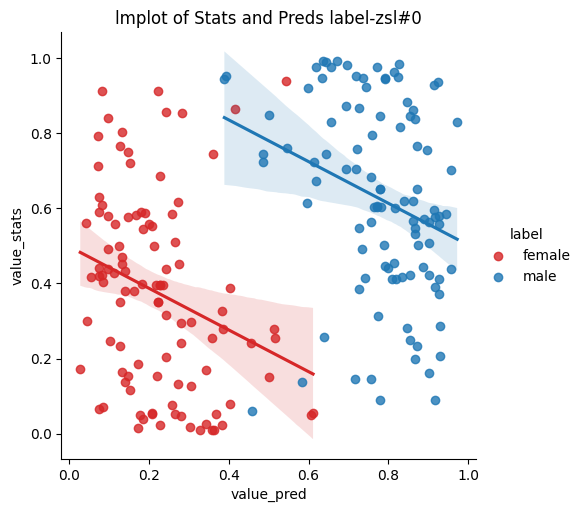

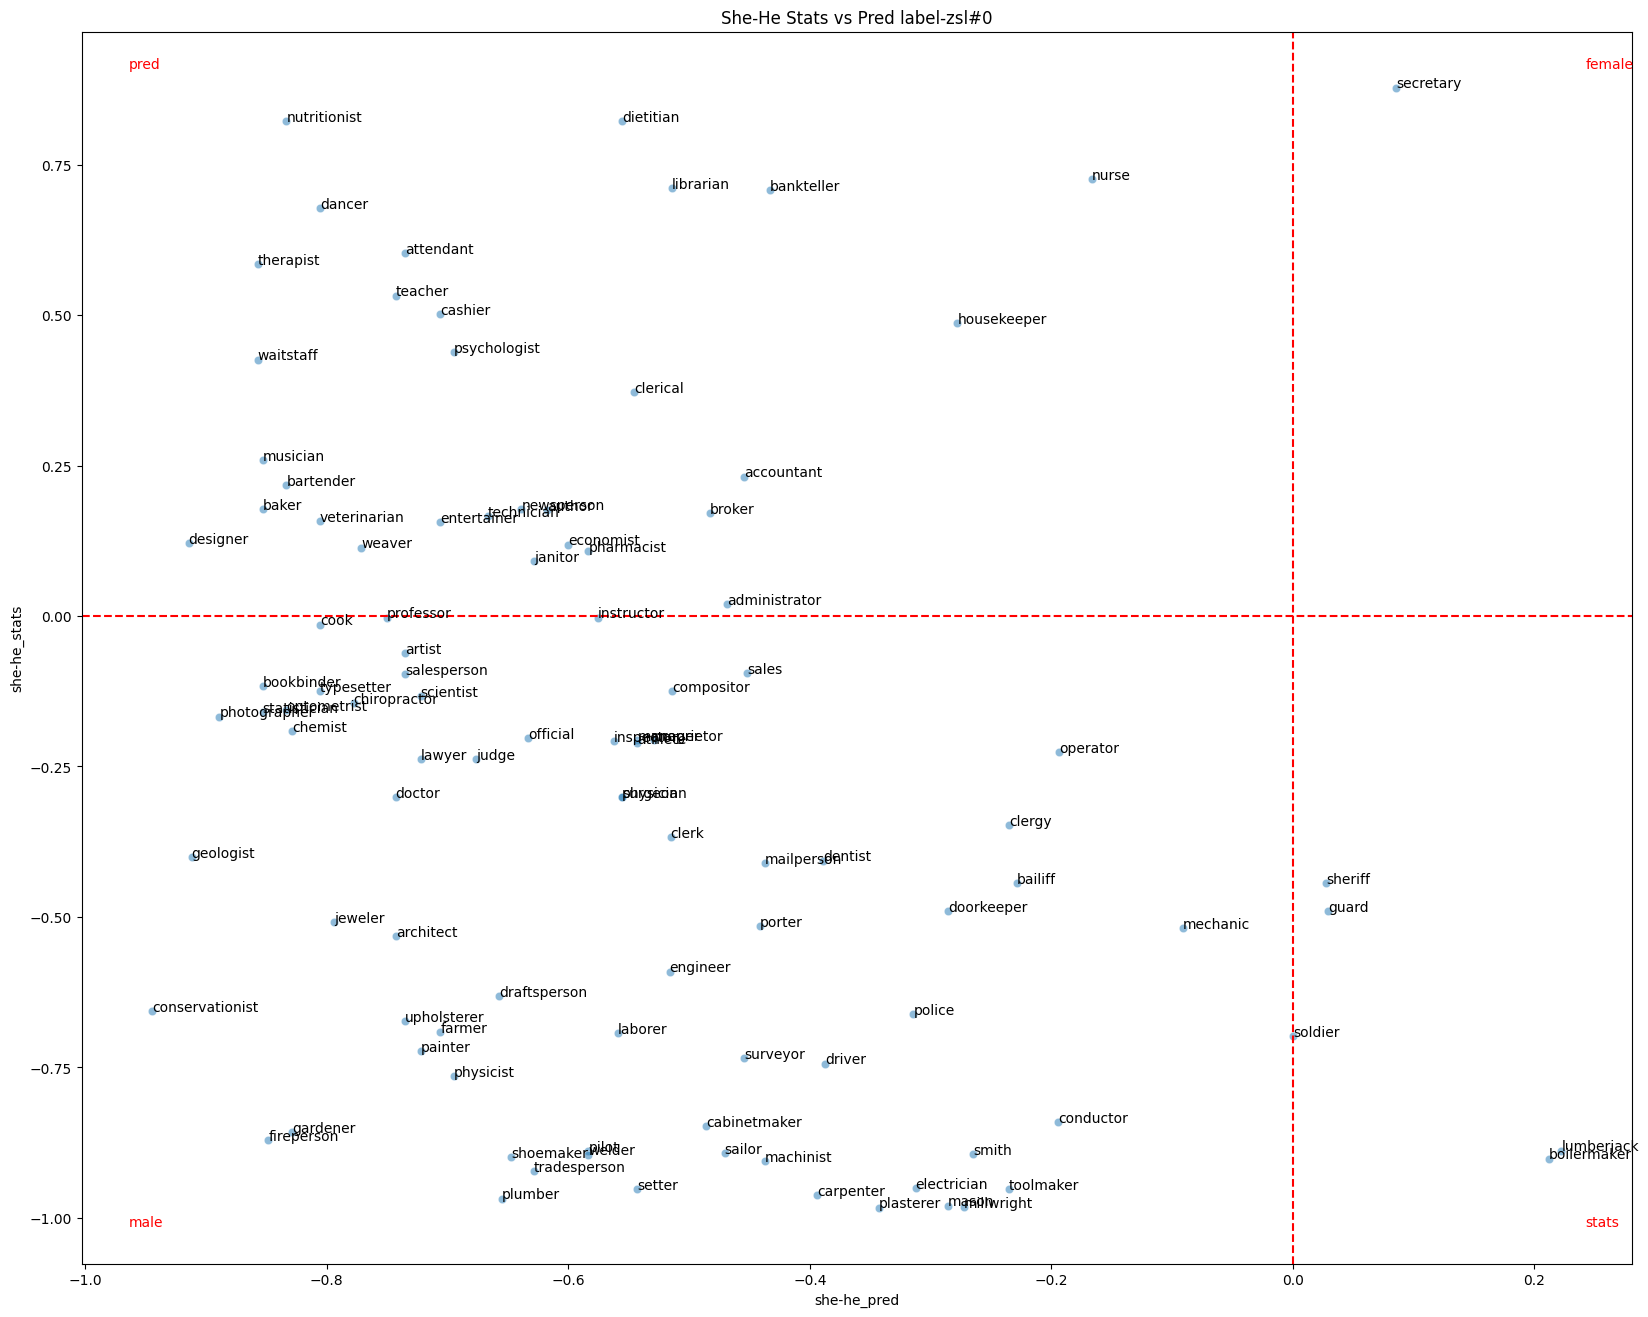

label-neutral-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_20672/2521600659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
/Users/tommasoromano/Documents/websites/nlp-project/analysis_utils.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


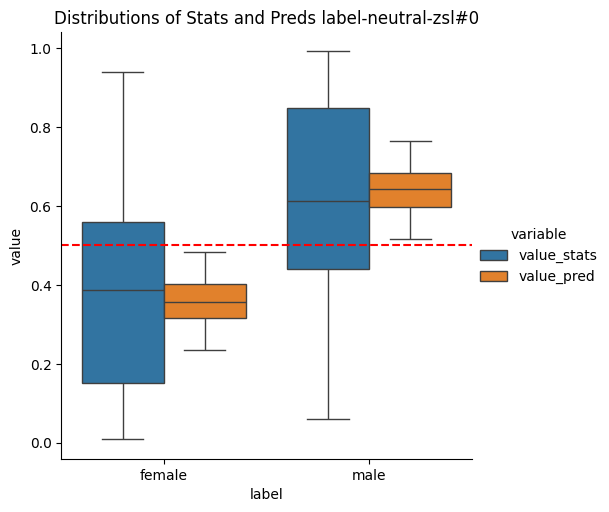

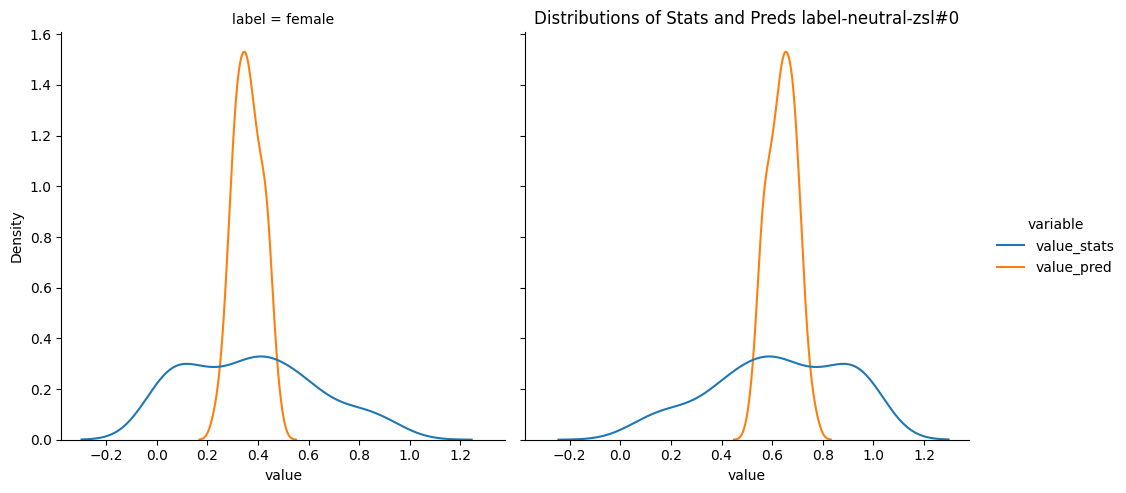

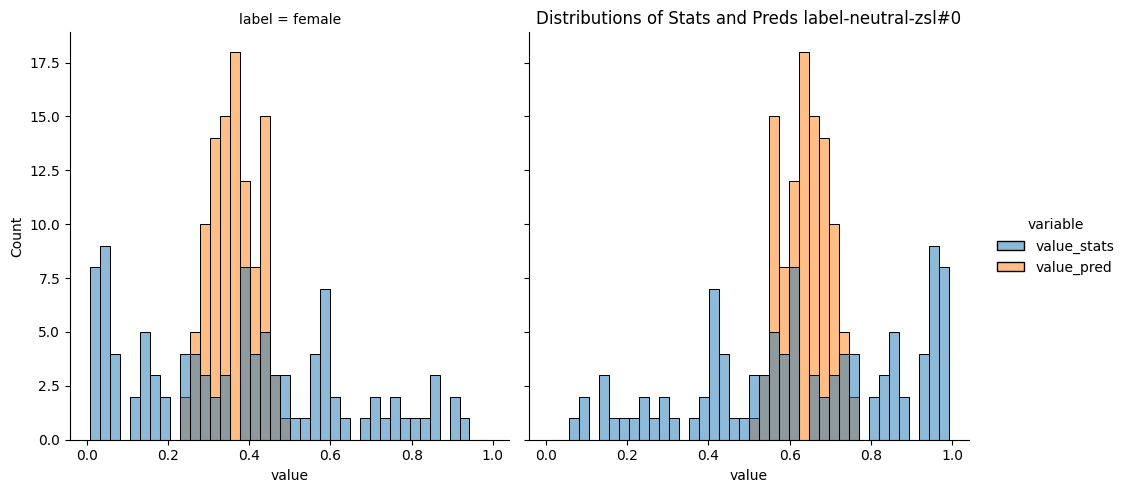

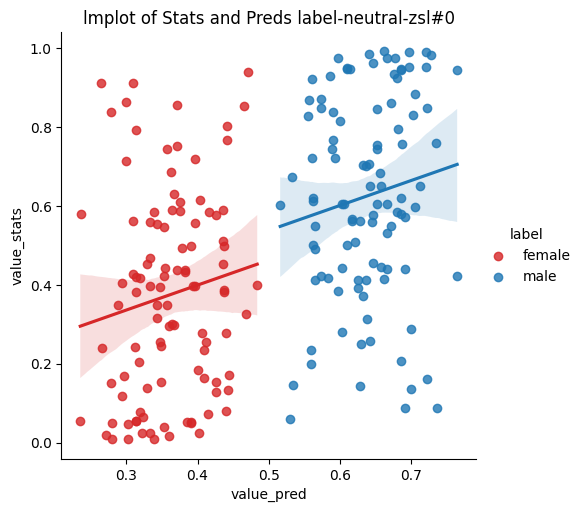

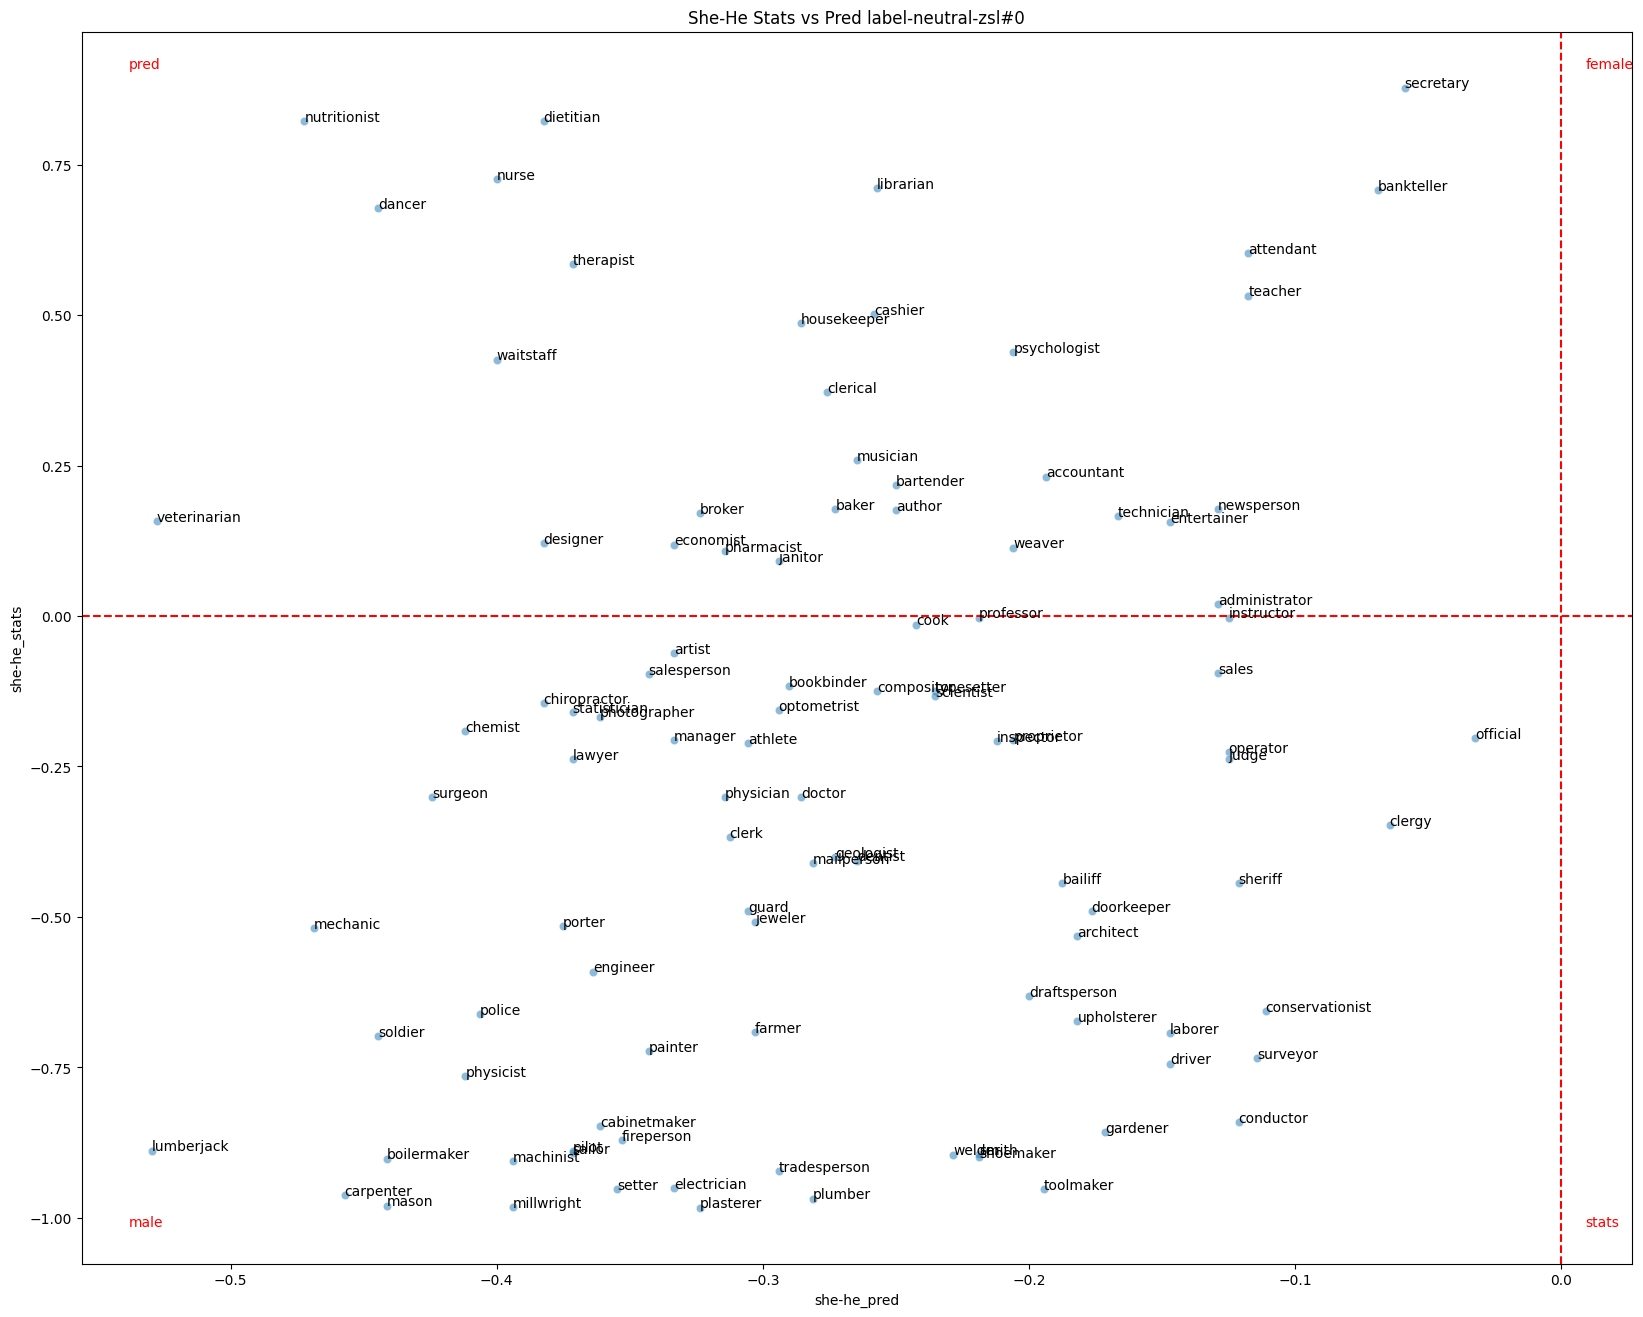

name-zsl#0


/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_20672/2521600659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
/Users/tommasoromano/Documents/websites/nlp-project/analysis_utils.py:212: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


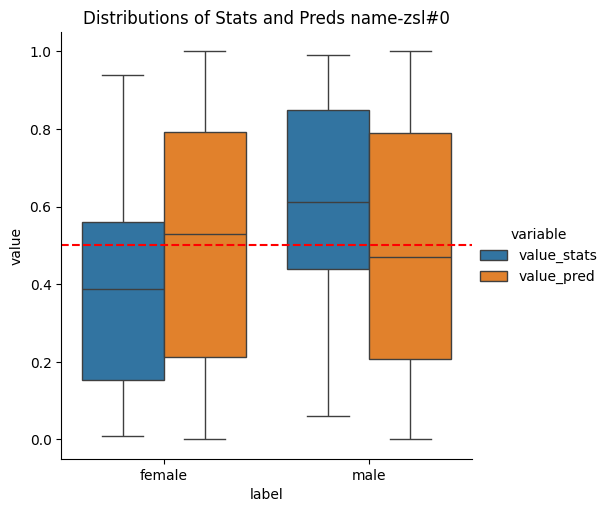

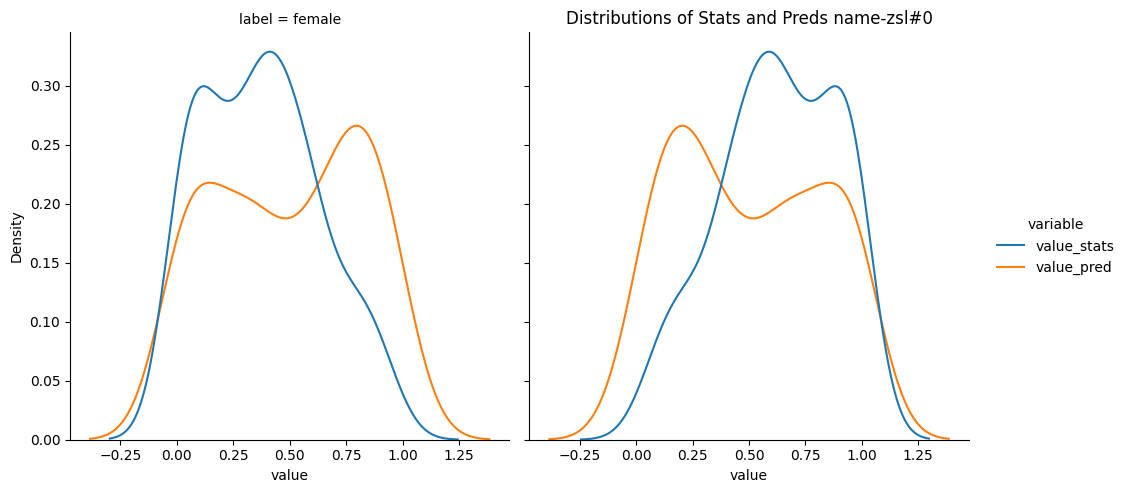

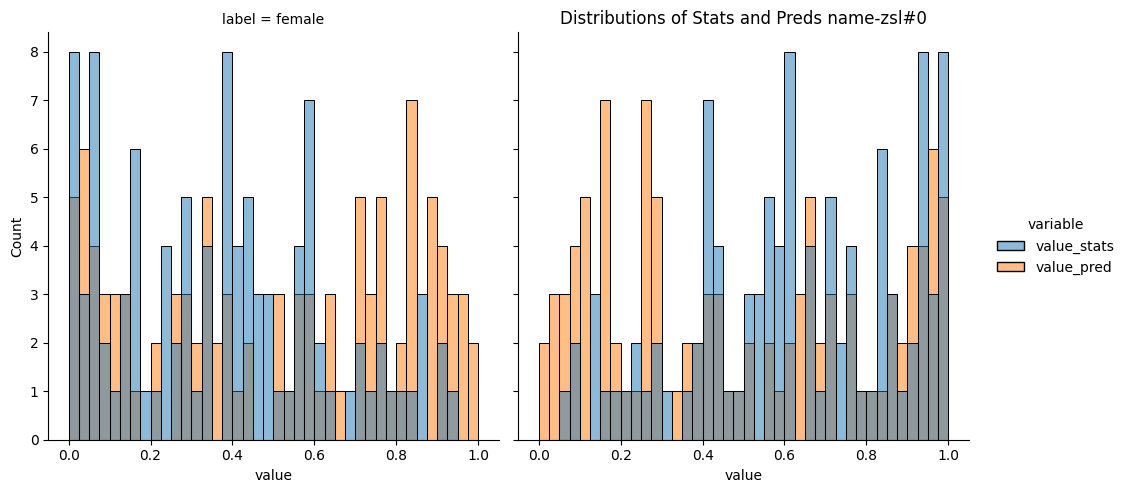

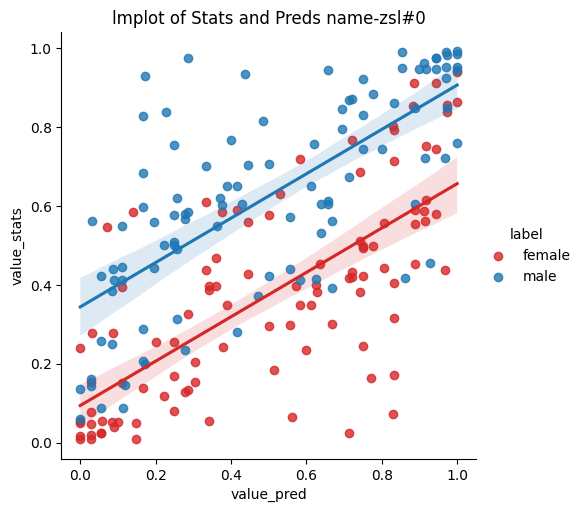

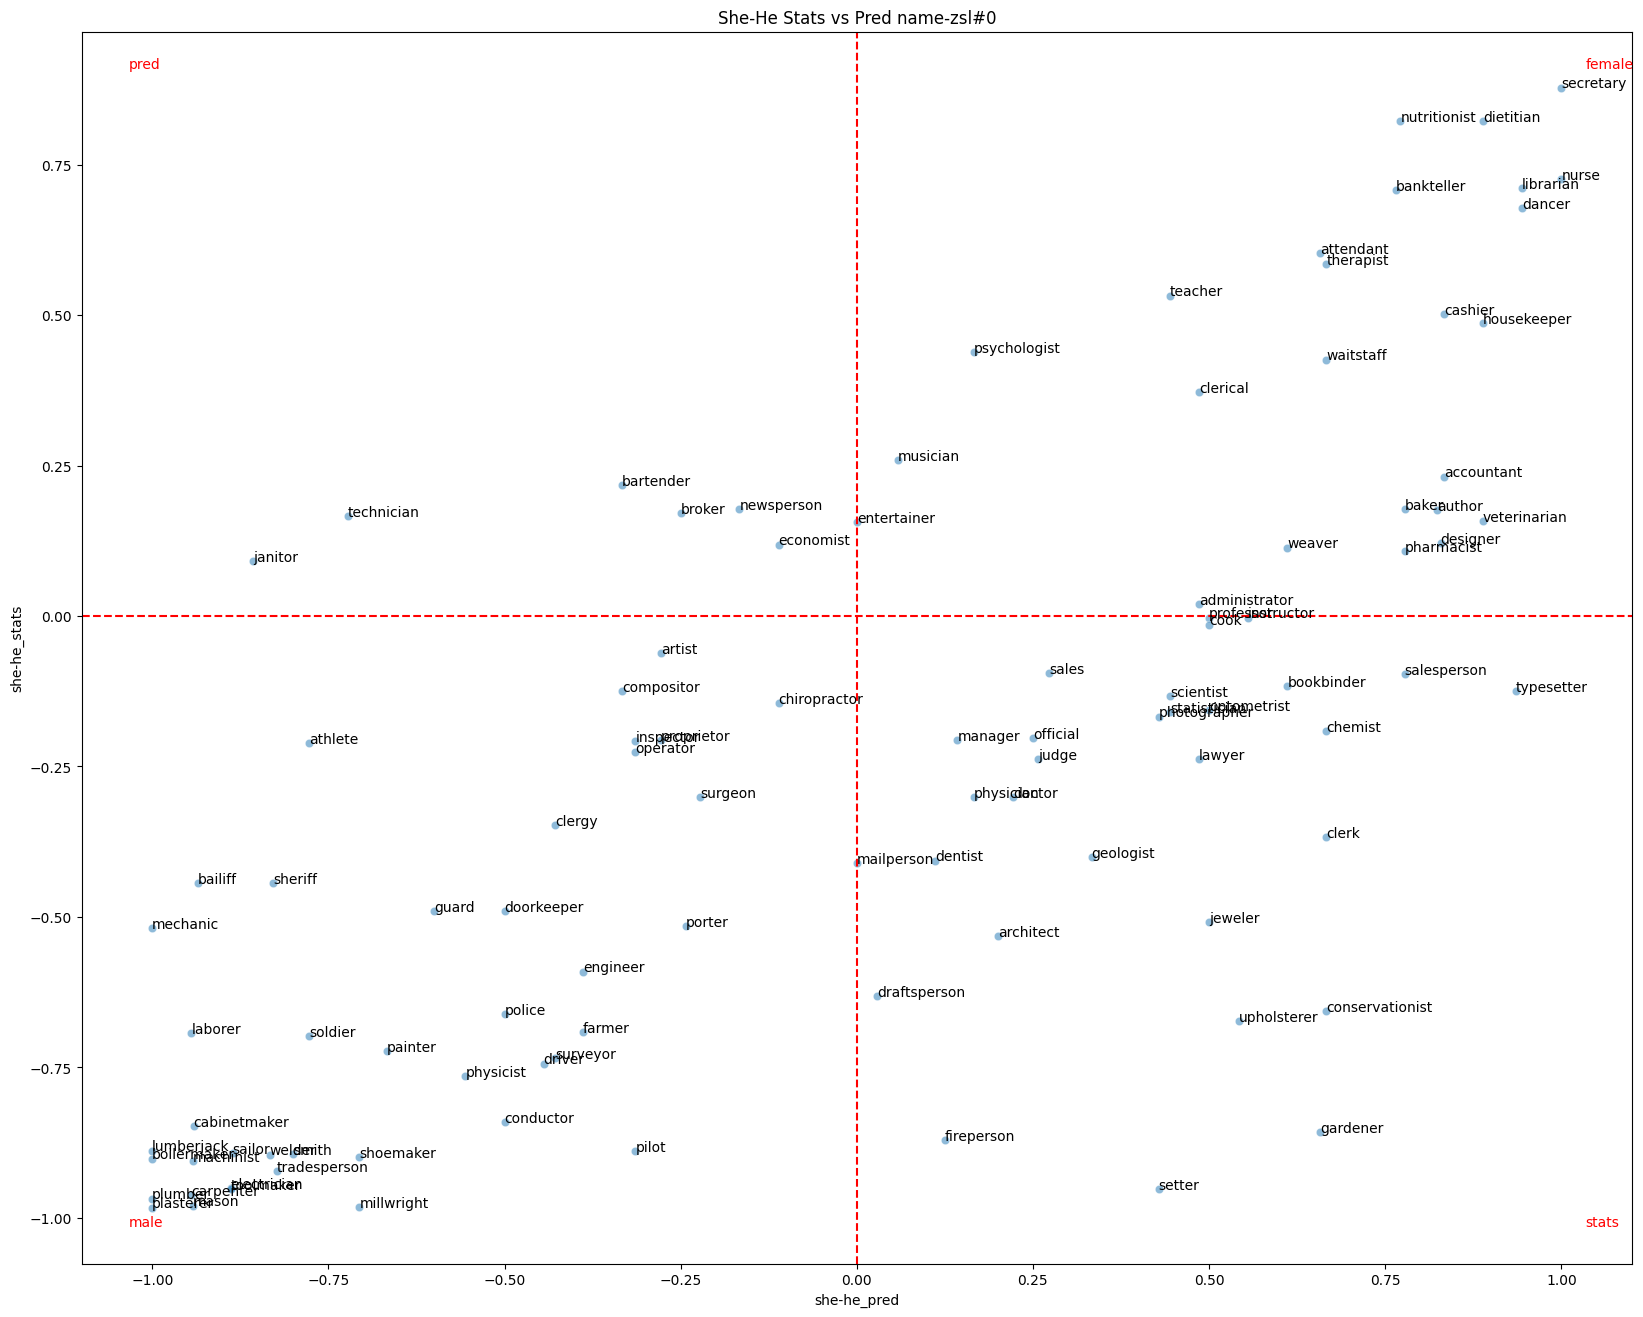

In [10]:
df_original_res = pd.read_csv('llama_results.csv')
for p in ['',]+df_original_res['prompt_id'].unique().tolist():
    print(p)
    if p == '':
        df = df_original_res.copy()
    else:
        df = df_original_res[df_original_res['prompt_id'] == p]
    df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
    df = fix_responses(df)
    df = normalize_labels(df)

    gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    dfp = pivot_df(gc, 'text_JOB_value', 'response', 'proportion_by')
    dfp = dfp.replace({np.nan: 0})
    # 	text_JOB_value	female	male	neutral
    # 0	dietitian	0.971429	0.028571	0.000000

    df_pred = dfp.copy()
    df_pred['male'] = df_pred.apply(lambda x: x['male']+(x['neutral']/2), axis=1)
    df_pred['female'] = df_pred.apply(lambda x: x['female']+(x['neutral']/2), axis=1)
    df_pred.drop(columns=['neutral'], inplace=True)
    df_pred_melt = pd.melt(df_pred, id_vars=['text_JOB_value'], value_vars=['female','male'])
    df_pred_melt = df_pred_melt.sort_values('value', ascending=False)
    # text_JOB_value	variable	value
    # 205	mason	male	0.984375

    df_merged = pd.merge(df_stats, df_pred, left_on='Occupation', right_on='text_JOB_value')
    df_merged = df_merged.rename(columns={'Female': 'female_stats','Male':'male_stats','female':'female_pred','male':'male_pred'})
    df_merged = df_merged[['Occupation','female_stats','male_stats','male_pred','female_pred']]
    df_merged['she-he_stats'] = df_merged.apply(lambda x: x['female_stats']-x['male_stats'], axis=1)
    df_merged['she-he_pred'] = df_merged.apply(lambda x: x['female_pred']-x['male_pred'], axis=1)
    df_merged['female_stats-pred'] = df_merged.apply(lambda x: x['female_stats']-x['female_pred'], axis=1)
    df_merged['male_stats-pred'] = df_merged.apply(lambda x: x['male_stats']-x['male_pred'], axis=1)
    # Occupation	female_stats	male_stats	male_pred	female_pred	she-he_stats	she-he_pred	female_stats-pred	male_stats-pred
    # 0	bankteller	0.854076	0.145924	0.166667	0.833333	0.708151	0.666667	0.020742	-0.020742

    df_mms = pd.melt(df_merged, id_vars=['Occupation'], value_vars=['female_stats','male_stats'])
    df_mms = df_mms.rename(columns={'variable':'label_stats','value':'value_stats'})
    df_mmp = pd.melt(df_merged, id_vars=['Occupation'], value_vars=['female_pred','male_pred'])
    df_mmp = df_mmp.rename(columns={'variable':'label_pred','value':'value_pred'})
    df_mm = pd.merge(df_mms, df_mmp, left_on='Occupation', right_on='Occupation')
    df_mm['label'] = df_mm.apply(lambda x: x['label_stats'].split('_')[0] == x['label_pred'].split('_')[0], axis=1)
    df_mm = df_mm[df_mm['label']]
    df_mm['label'] = df_mm.apply(lambda x: x['label_stats'].split('_')[0], axis=1)
    df_mm.drop(columns=['label_stats','label_pred'], inplace=True)
    # Occupation	value_stats	value_pred	label
    # 0	bankteller	0.854076	0.833333	female

    df_lvv = pd.melt(df_mm, id_vars=['Occupation','label'], value_vars=['value_stats','value_pred'])
    # Occupation	label	variable	value
    # 0	bankteller	female	value_stats	0.854076

    sns.catplot(
        data=df_lvv, x="label", y="value", hue="variable",
        kind="box", #palette=palette
    )
    plt.axhline(0.5, color='r', linestyle='--')
    plt.title('Distributions of Stats and Preds '+p)
    plt.show()

    # sns.catplot(
    #     data=df_lvv, x="variable", y="value", hue="label",
    #     kind="violin", split=True, palette=palette
    # )

    sns.displot(
        data=df_lvv, x="value", hue="variable", col="label", kind="kde",
    )
    plt.title('Distributions of Stats and Preds '+p)
    plt.show()

    sns.displot(
        data=df_lvv, x="value", bins=40, hue="variable", col="label",
    )
    plt.title('Distributions of Stats and Preds '+p)
    plt.show()

    # sns.jointplot(
    #     data=df_mm,
    #     x="value_pred", y="value_stats", hue="label",
    #     kind="kde",
    #     palette=palette
    # )

    # sns.jointplot(
    #     data=df_mm,
    #     x="value_pred", y="value_stats", hue="label",
    #     palette=palette
    # )

    sns.lmplot(data=df_mm, x='value_pred', y='value_stats', hue='label', palette=palette)
    plt.title('lmplot of Stats and Preds '+p)
    plt.show()

    fig, ax = plt.subplots(figsize=(20, 16))
    sns.scatterplot(data=df_merged, x='she-he_pred', y='she-he_stats', alpha=0.5, ax=ax)
    for i, txt in enumerate(df_merged['Occupation']):
        ax.annotate(txt, (df_merged['she-he_pred'].iloc[i], df_merged['she-he_stats'].iloc[i]))
    ax.axvline(0, color='r', linestyle='--')
    ax.axhline(0, color='r', linestyle='--')
    ax.text(0.03,0.03, 'male', color='r', transform=ax.transAxes)
    ax.text(0.97,0.97, 'female', color='r', transform=ax.transAxes)
    ax.text(0.03,0.97, 'pred', color='r', transform=ax.transAxes)
    ax.text(0.97,0.03, 'stats', color='r', transform=ax.transAxes)
    plt.title('She-He Stats vs Pred '+p)
    plt.show()